# Feature Engineering in Appliciaton Data Set

### 0. Import

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',300)
pd.set_option('display.float_format',lambda x: '%.3f' % x)
pd.set_option('display.max_colwidth',30)


### 1. Load Data

In [16]:
app_train = pd.read_csv('data/application_train.csv')
app_test = pd.read_csv('data/application_test.csv')

### 2. Missing Values

<Axes: >

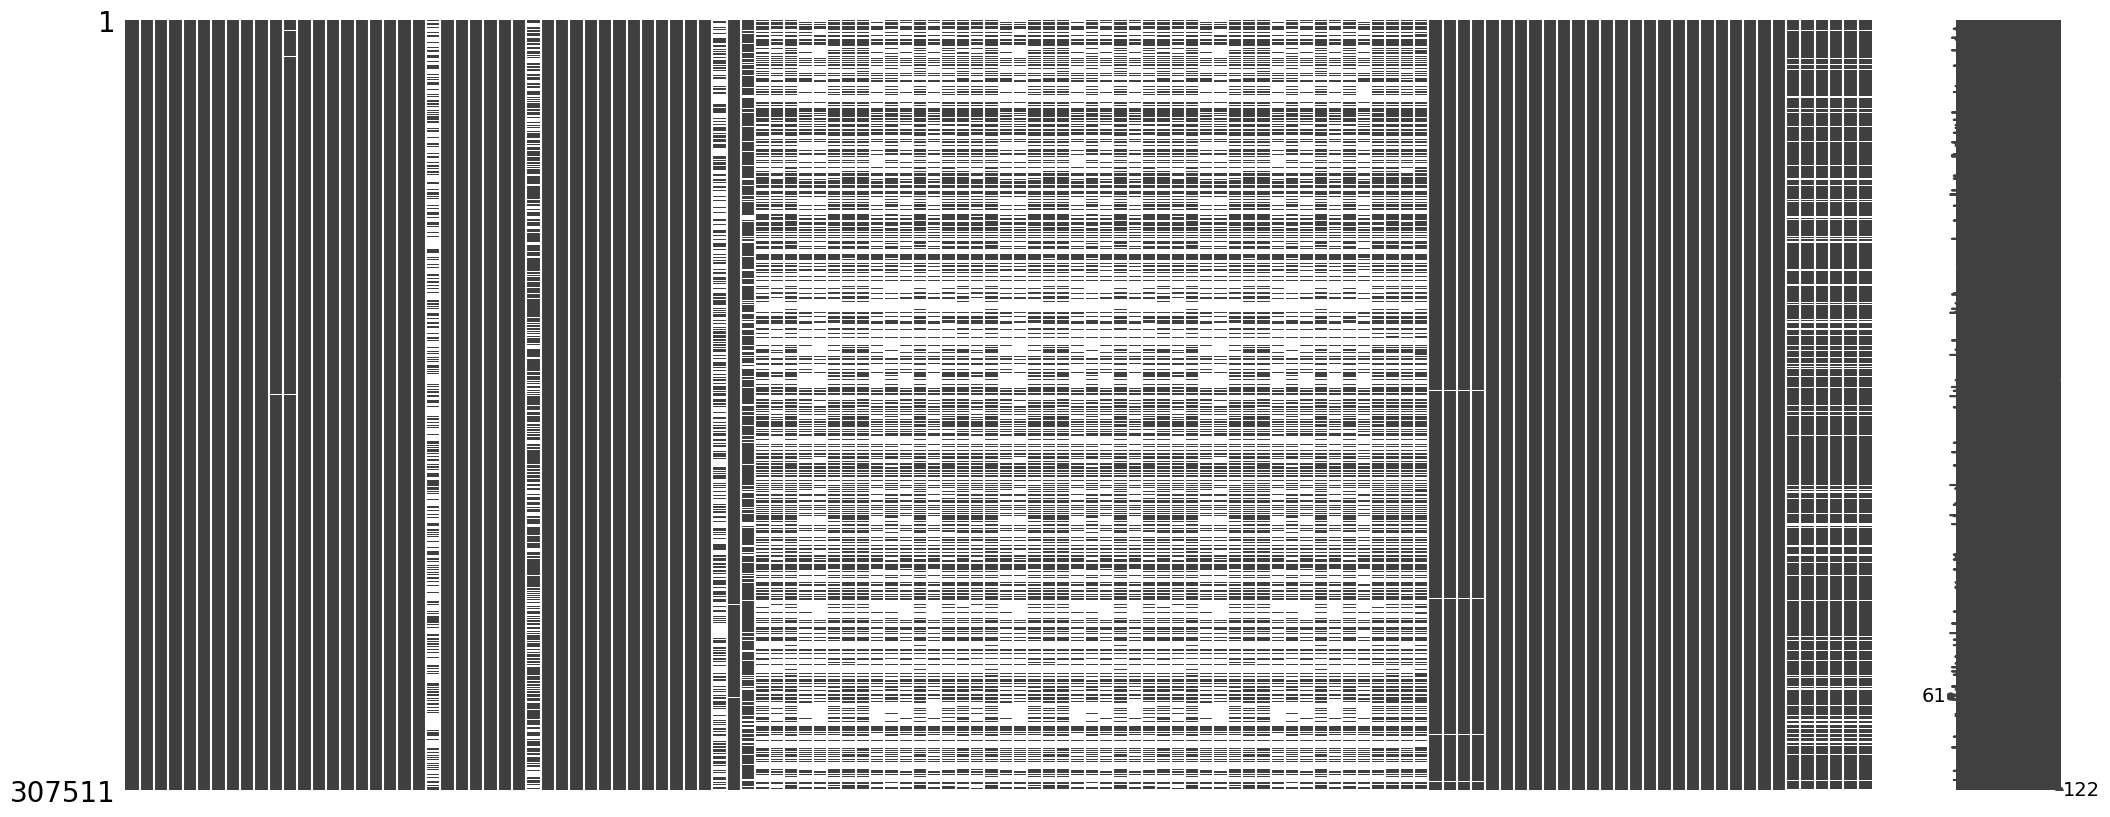

In [17]:
import missingno as msno

msno.matrix(app_train)

In [18]:
app_train.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [19]:
app_train.columns[app_train.isnull().sum() > 1000]
# Many Columns have missing values more than 1000

Index(['NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


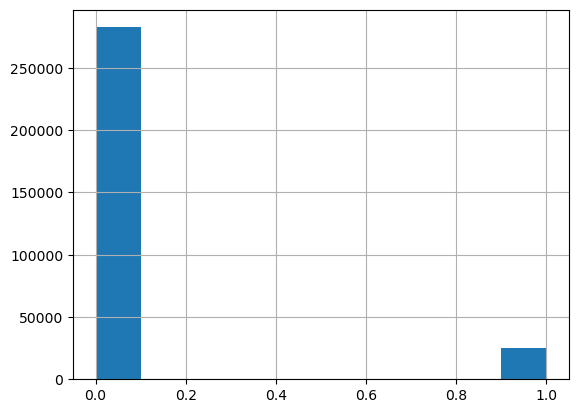

In [20]:
app_train['TARGET'].value_counts()
# 0 : 282686, 1 : 24825

app_train['TARGET'].hist()

app_train.info()

### 3. Visualize histograms for continuous numerical features when TARGET is 0 and 1 respectively

In [21]:
def show_hist_by_target(df, features):
    cond0 = (df['TARGET'] == 0)
    cond1 = (df['TARGET'] == 1)

    for feature in features:
        print(f'feature: {feature}')
        fig, ax = plt.subplots(nrows = 1,ncols = 2, figsize=(10,5), squeeze = False)
        sns.violinplot(x='TARGET', y=feature, data=df, ax=ax[0][0], palette= 'Set2' )
        sns.histplot(df[cond0][feature], ax=ax[0][1], bins= 50, stat='density', kde=True, color='blue', label = 'TARGET == 0')
        sns.histplot(df[cond1][feature], ax=ax[0][1], bins= 50, stat='density', kde=True, color='red', label = 'TARGET == 1')
        plt.show()


In [22]:
# Choose some numerical features based on plot_importance (in Credit_Default_00) to visualize
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
           'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'EXT_SOURCE_1', 
           'EXT_SOURCE_2', 'EXT_SOURCE_3']

feature: AMT_INCOME_TOTAL


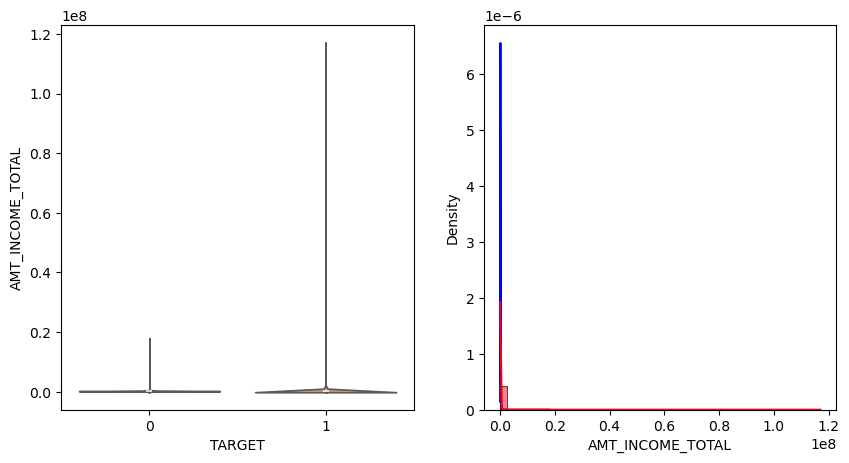

feature: AMT_CREDIT


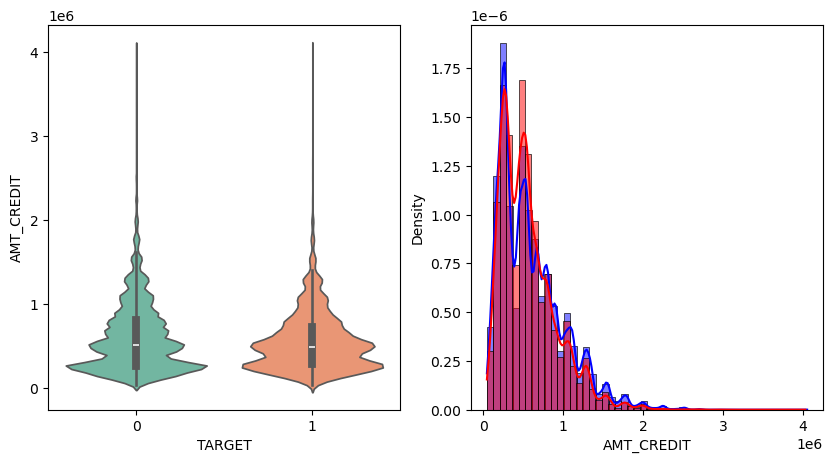

feature: AMT_ANNUITY


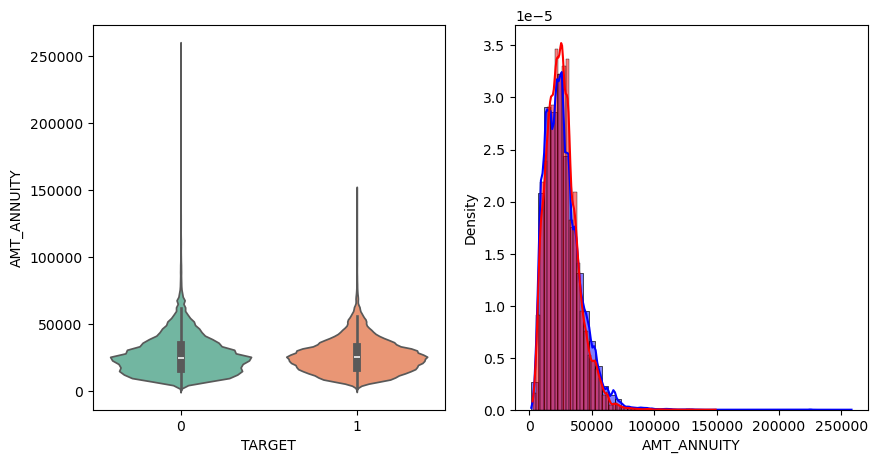

feature: AMT_GOODS_PRICE


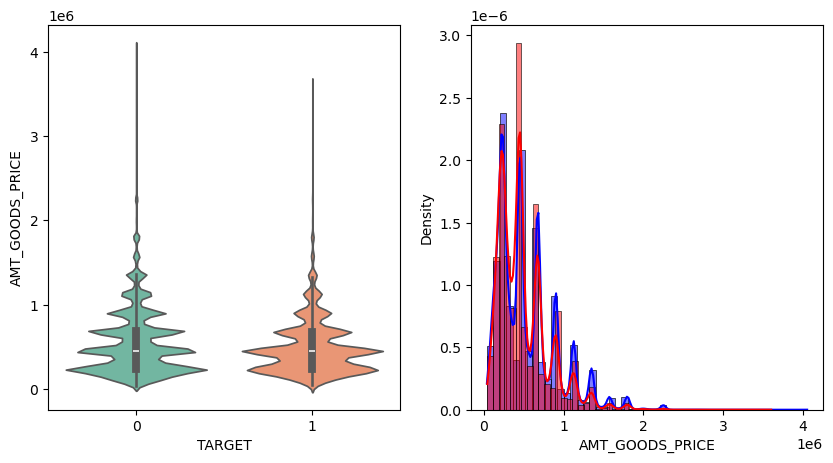

feature: DAYS_BIRTH


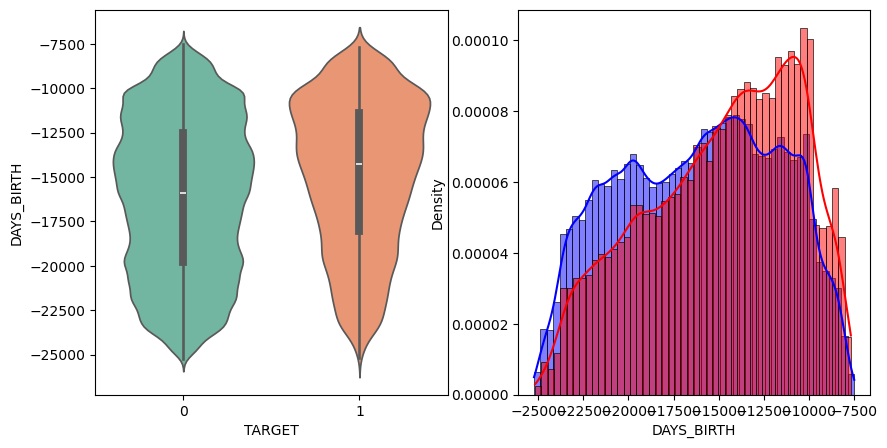

feature: DAYS_EMPLOYED


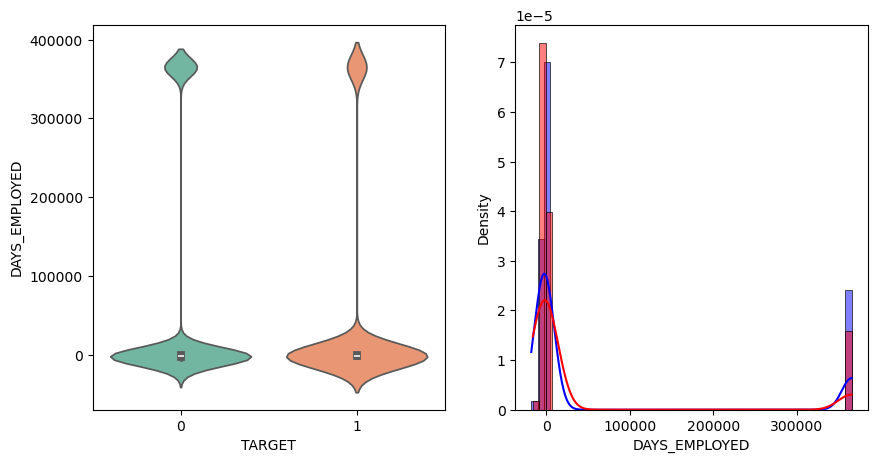

feature: DAYS_ID_PUBLISH


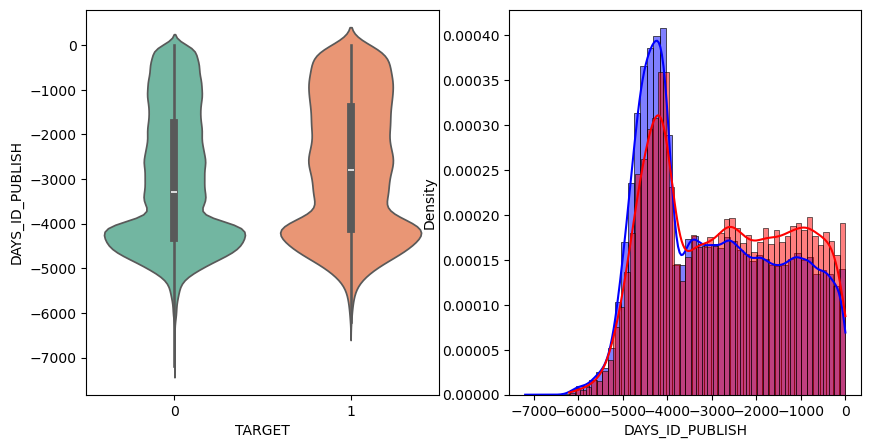

feature: DAYS_REGISTRATION


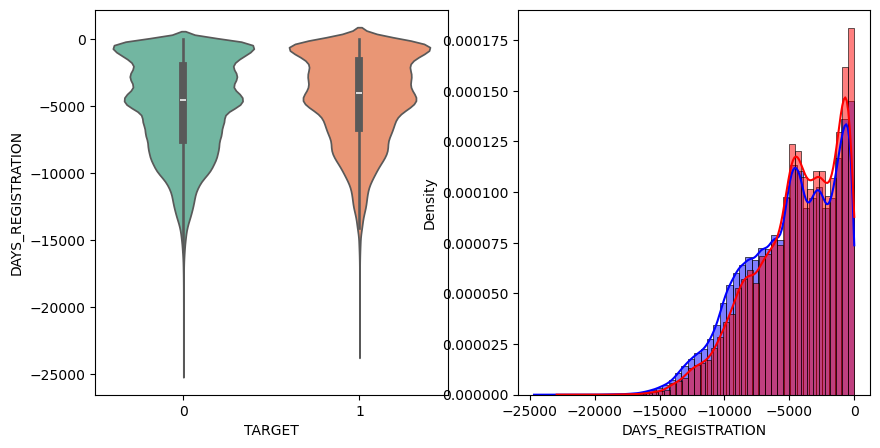

feature: DAYS_LAST_PHONE_CHANGE


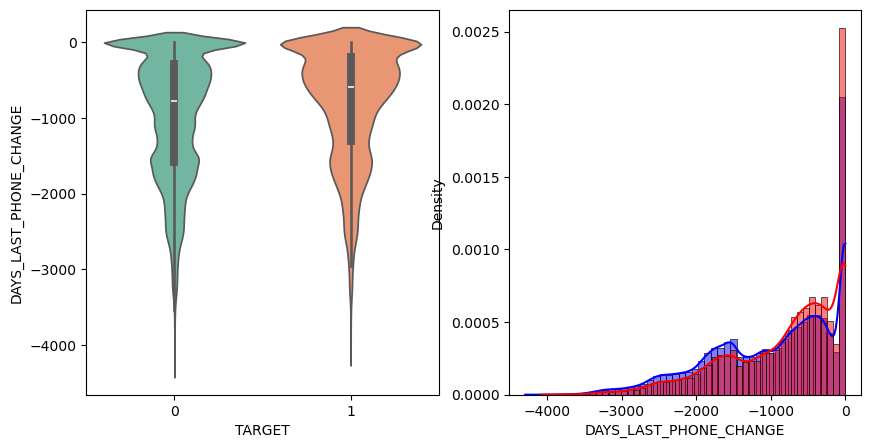

feature: CNT_FAM_MEMBERS


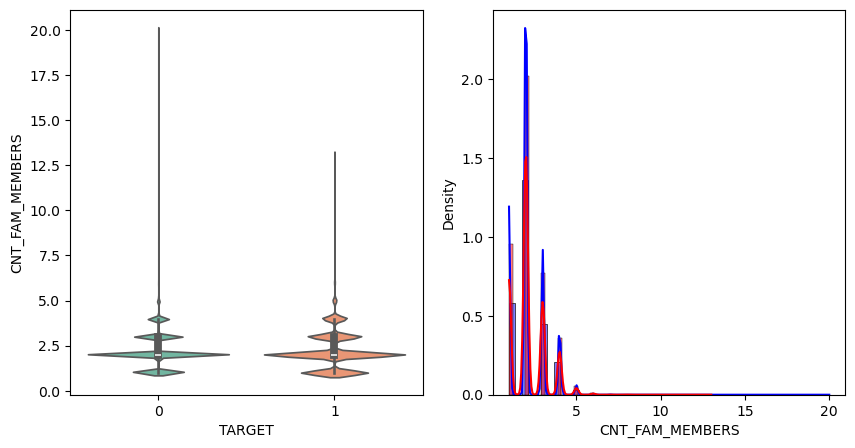

feature: REGION_RATING_CLIENT


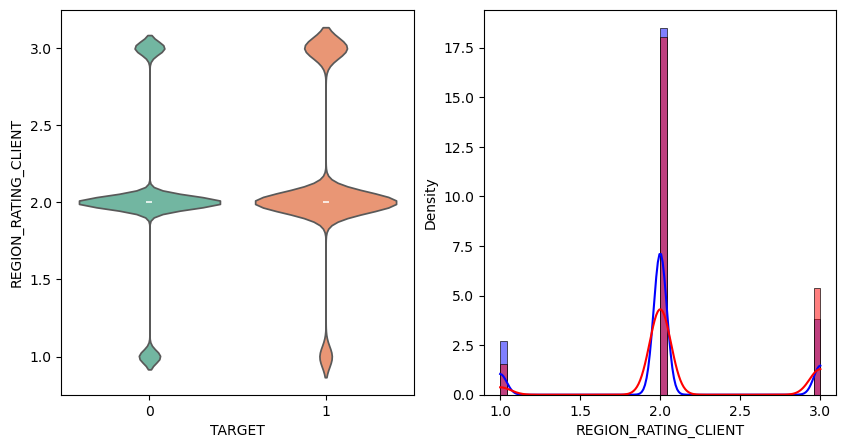

feature: EXT_SOURCE_1


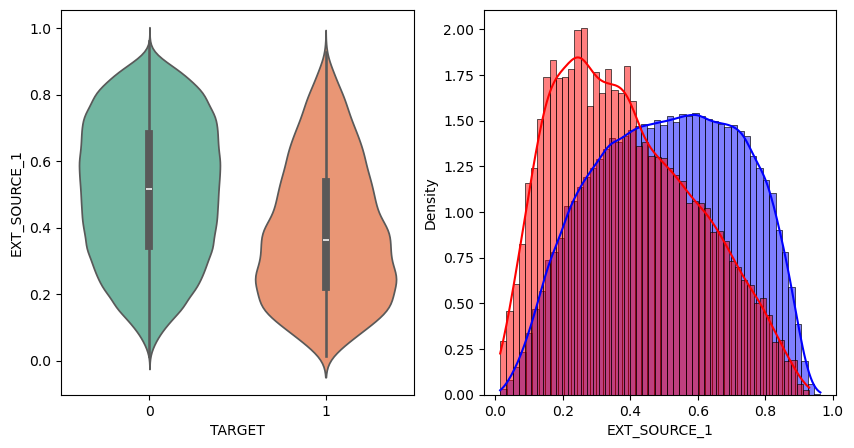

feature: EXT_SOURCE_2


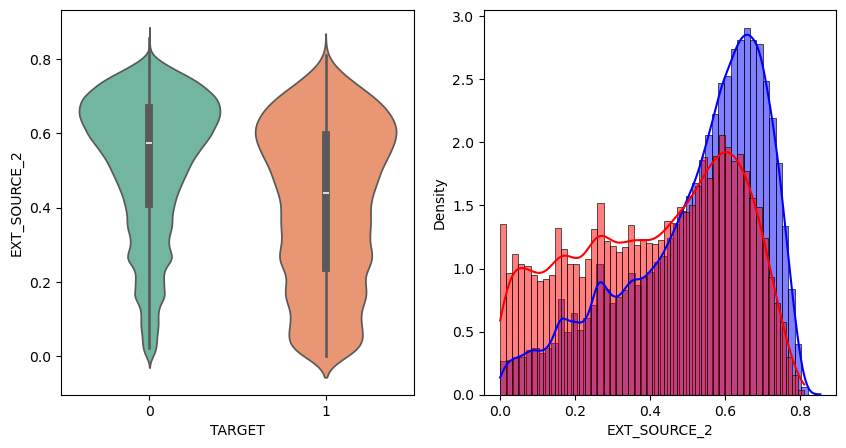

feature: EXT_SOURCE_3


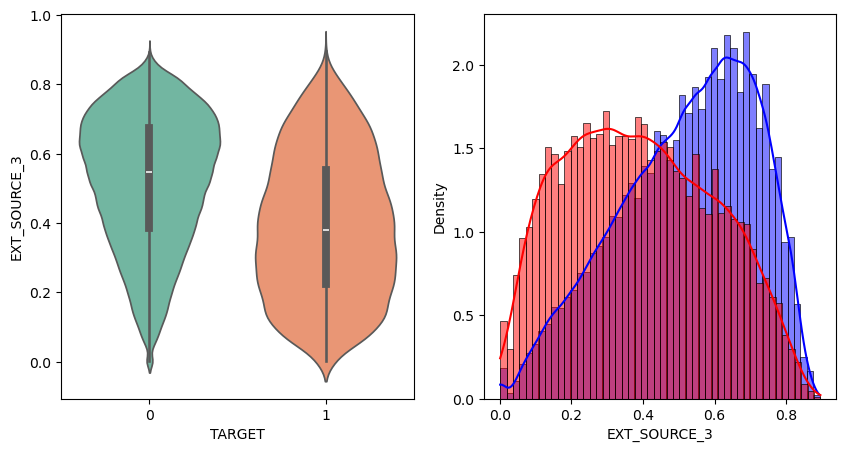

In [23]:
show_hist_by_target(app_train, columns)

- DAYS_EMPLPOYEED feature has 'outlier'

In [24]:
app_train['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: count, Length: 12574, dtype: int64

In [25]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].replace(365243, np.nan)

In [26]:
app_train['DAYS_EMPLOYED'].value_counts(dropna=False)

DAYS_EMPLOYED
NaN           55374
-200.000        156
-224.000        152
-230.000        151
-199.000        151
              ...  
-13961.000        1
-11827.000        1
-10176.000        1
-9459.000         1
-8694.000         1
Name: count, Length: 12574, dtype: int64

### 4. Compare count values of object columns based on TARGET

feature: NAME_CONTRACT_TYPE


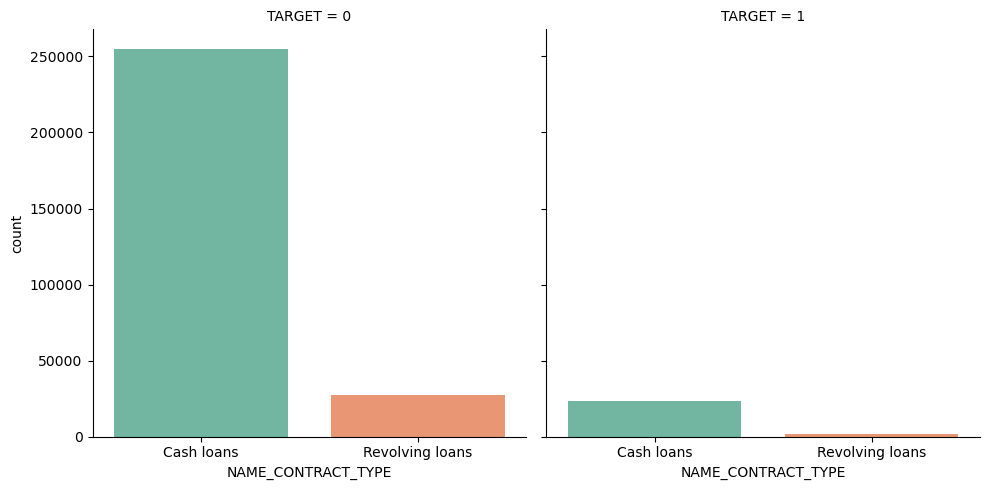

feature: CODE_GENDER


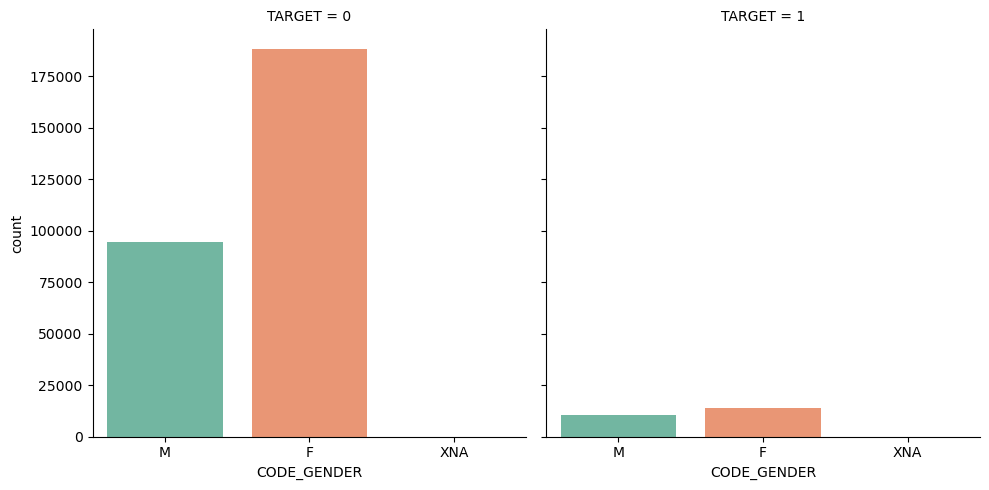

feature: FLAG_OWN_CAR


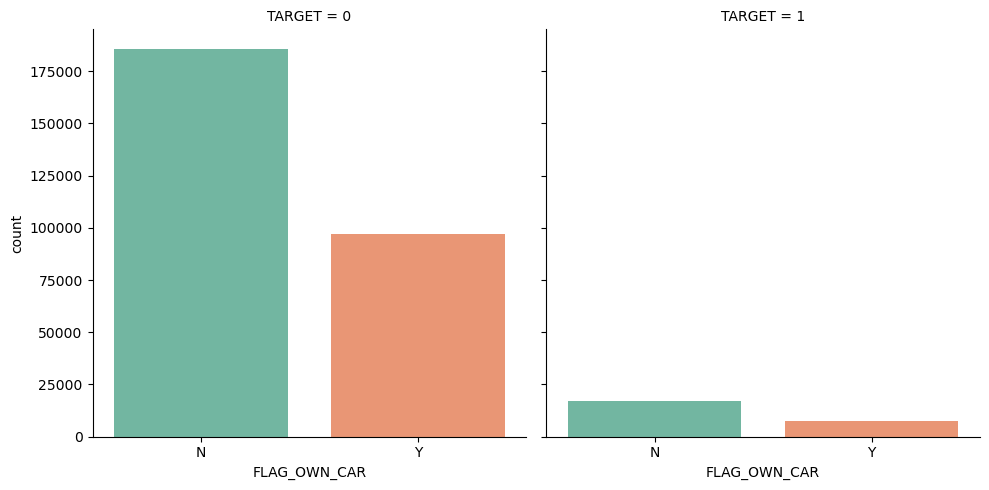

feature: FLAG_OWN_REALTY


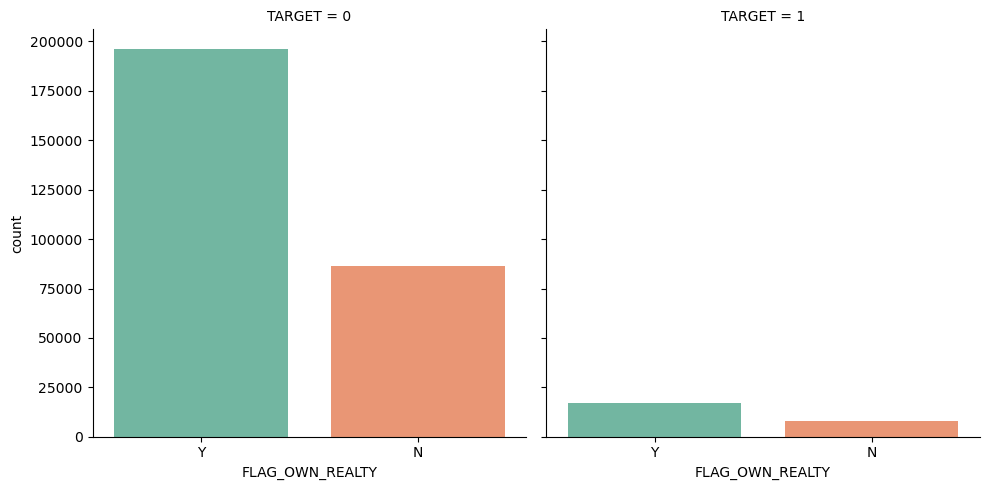

feature: NAME_TYPE_SUITE


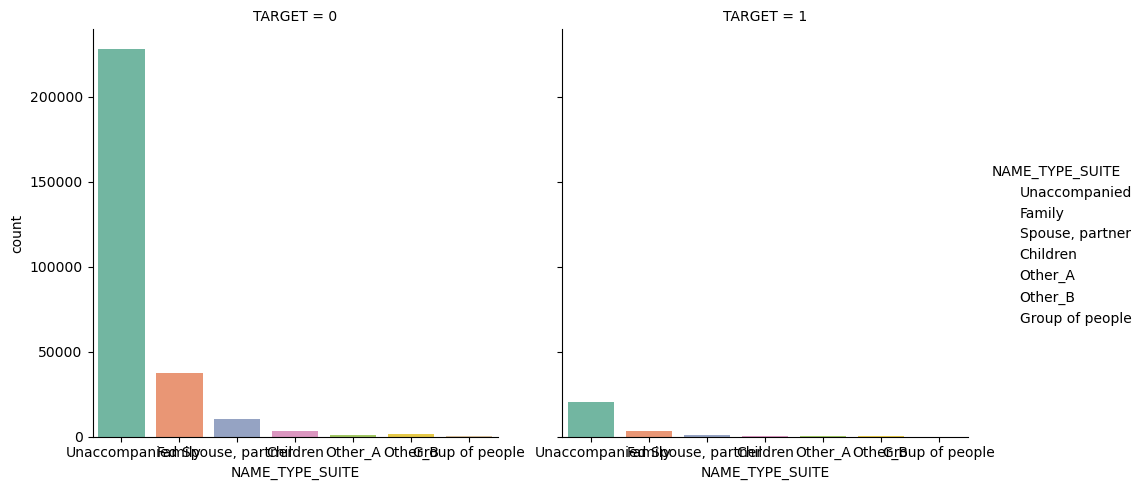

feature: NAME_INCOME_TYPE


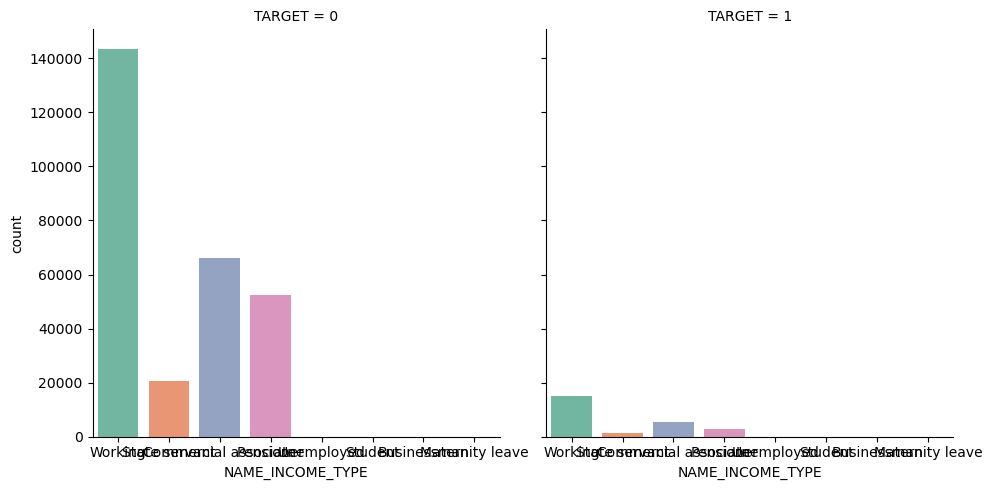

feature: NAME_EDUCATION_TYPE


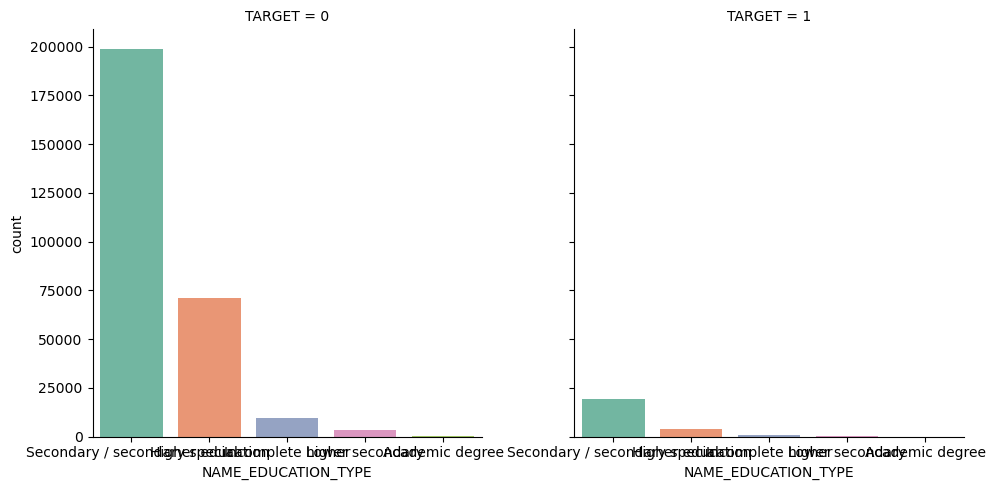

feature: NAME_FAMILY_STATUS


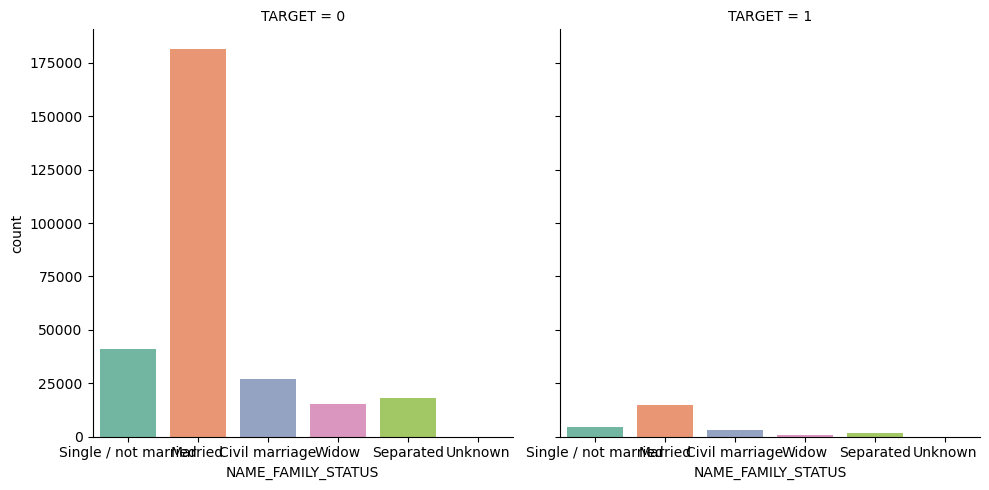

feature: NAME_HOUSING_TYPE


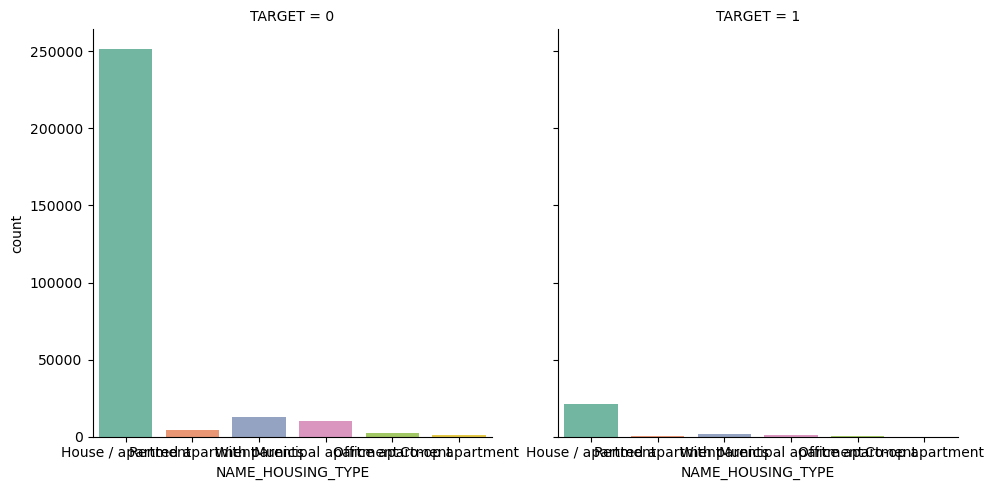

feature: OCCUPATION_TYPE


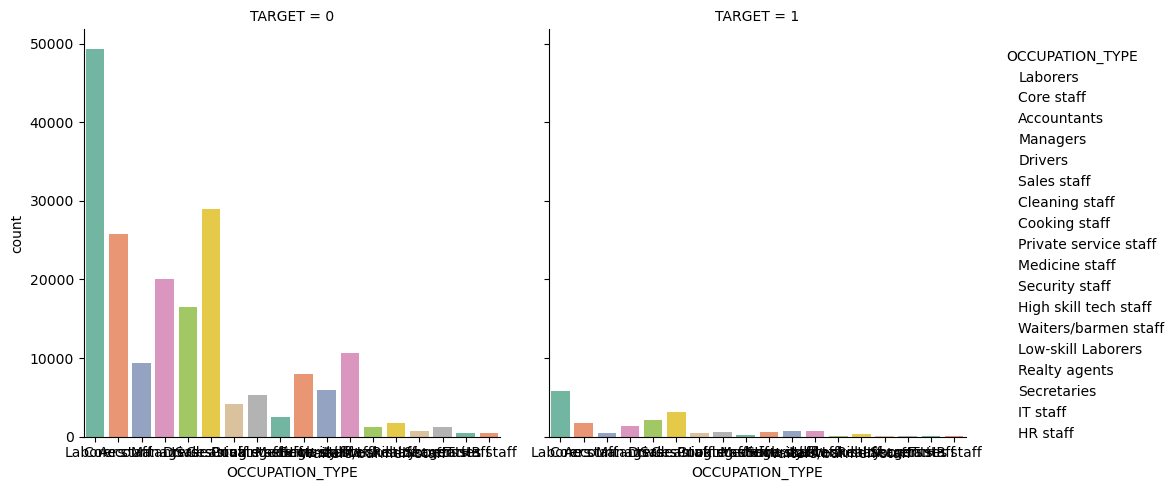

feature: WEEKDAY_APPR_PROCESS_START


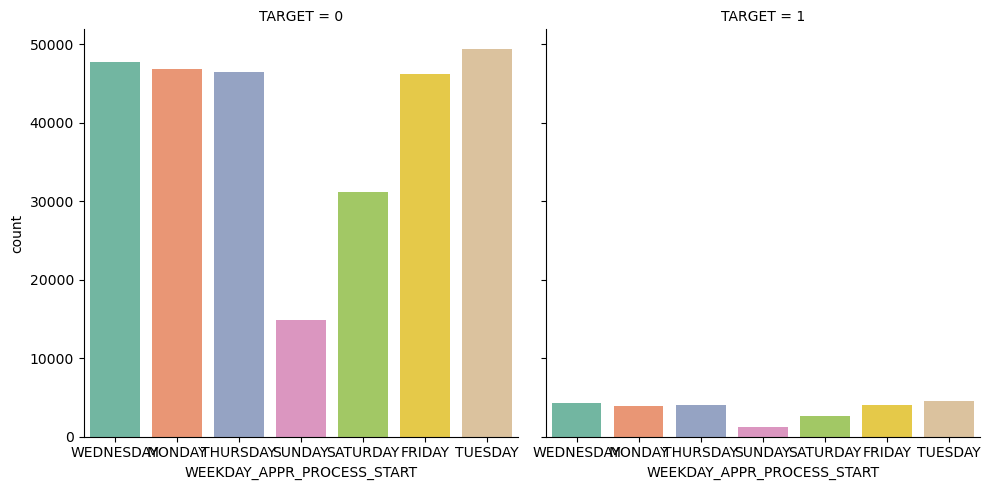

feature: ORGANIZATION_TYPE


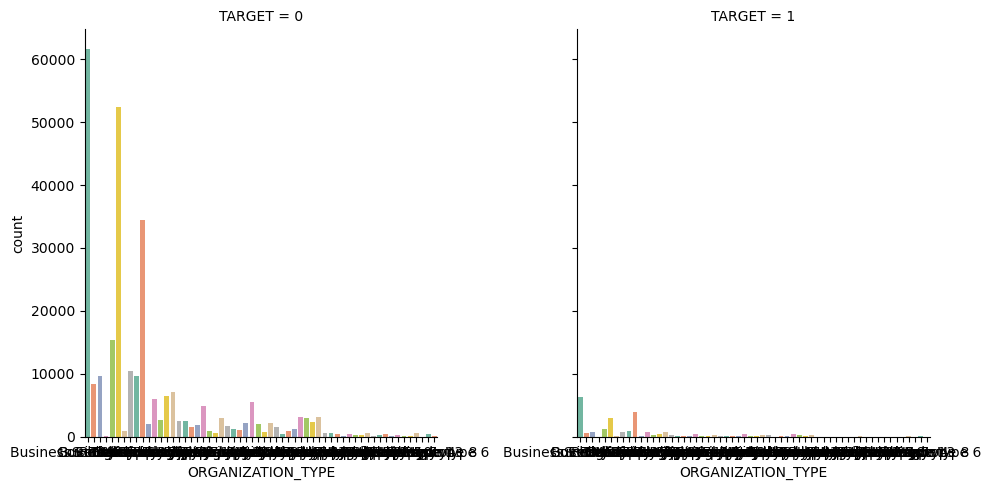

feature: FONDKAPREMONT_MODE


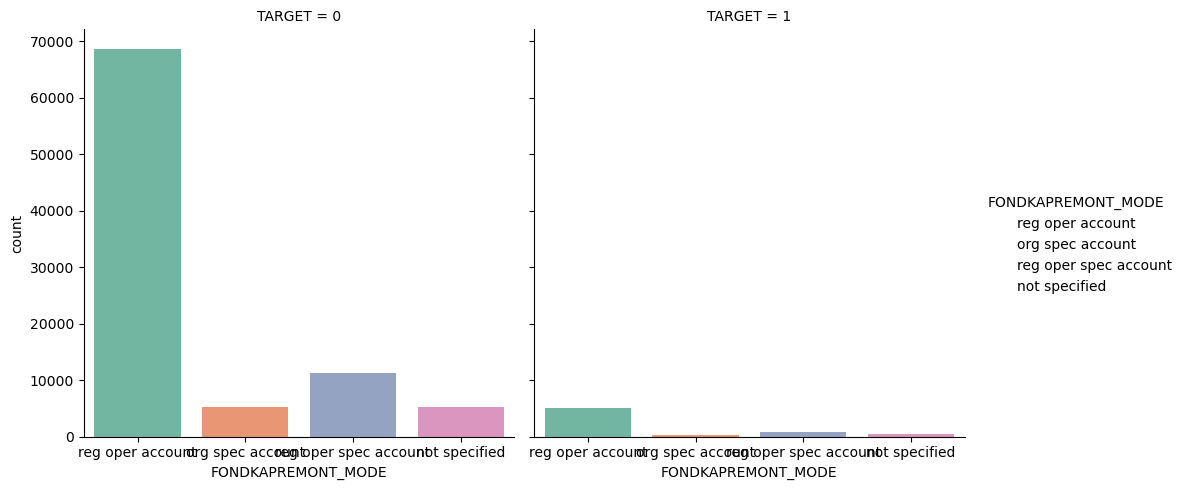

feature: HOUSETYPE_MODE


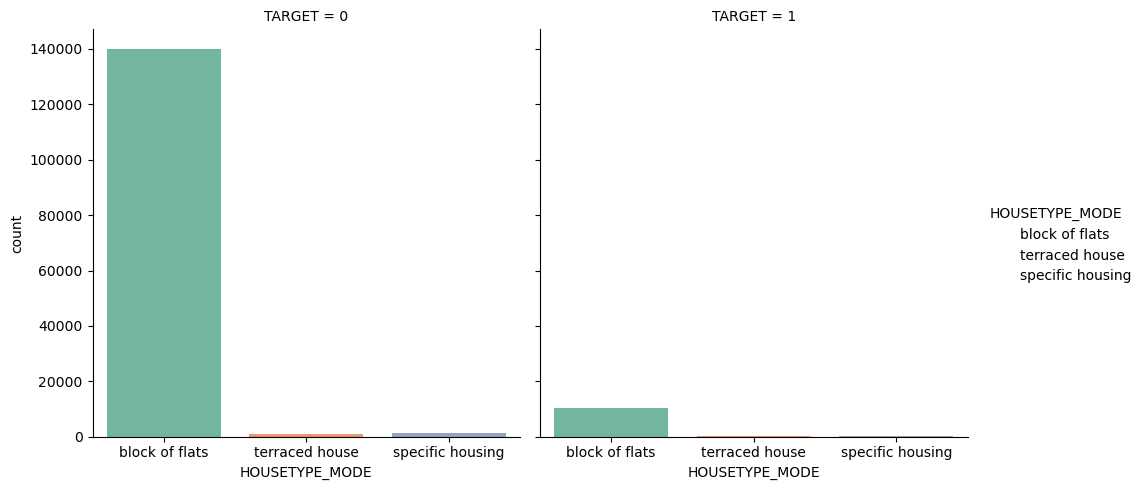

feature: WALLSMATERIAL_MODE


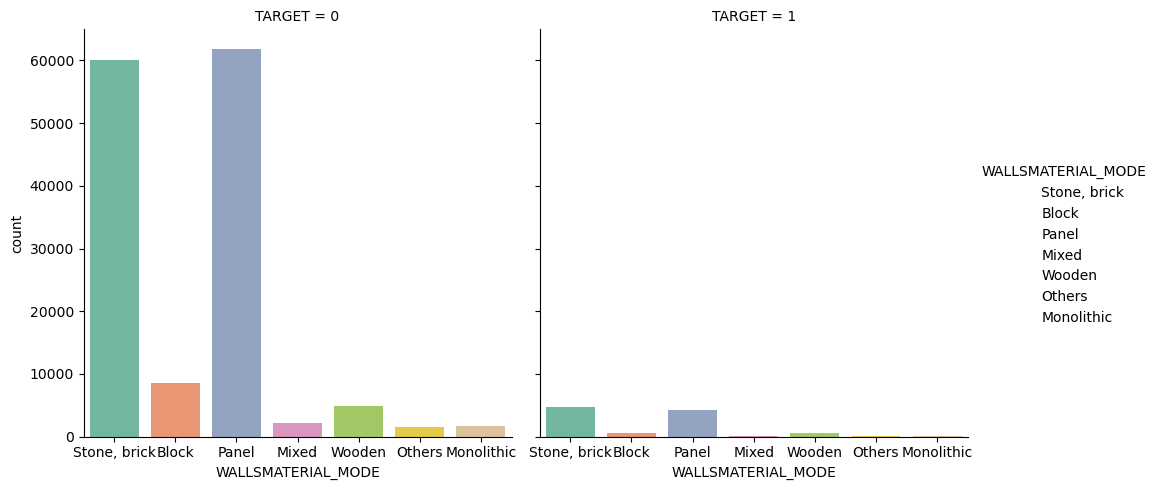

feature: EMERGENCYSTATE_MODE


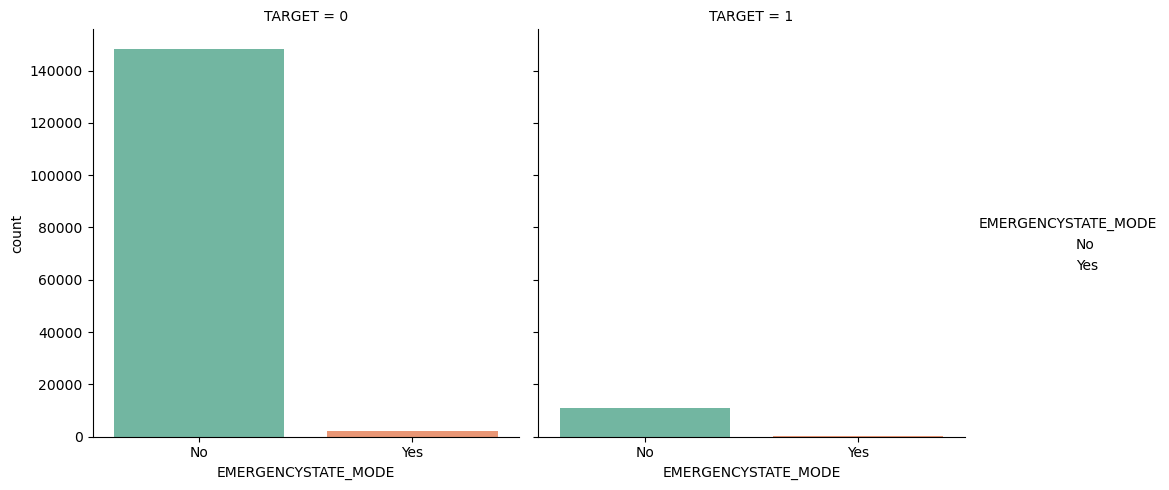

In [27]:
object_coumns = app_train.dtypes[app_train.dtypes == 'object'].index.tolist()

def show_count_by_target(df, features):
    cond0 = (df['TARGET'] == 0)
    cond1 = (df['TARGET'] == 1)

    for feature in features:
        print(f'feature: {feature}')
        sns.catplot(x=feature, col='TARGET', data=df, kind='count', palette='Set2')
        plt.show()

show_count_by_target(app_train, object_coumns)

### 5. Feature Engineering on important features

In [28]:
apps = pd.concat([app_train, app_test])

- EXT_SOURCE 

In [29]:
apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)

In [30]:
apps['APPS_EXT_SOURCE_STD'].value_counts(dropna=False)
# Missing values are 40950

APPS_EXT_SOURCE_STD
NaN      40950
0.260        6
0.288        4
0.146        4
0.203        4
         ...  
0.041        1
0.071        1
0.030        1
0.298        1
0.130        1
Name: count, Length: 314496, dtype: int64

In [31]:
apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())

- AMT_CREDIT

In [32]:
apps['APPS_ANNUITY_CREDIT_RATIO'] = apps['AMT_ANNUITY'] / apps['AMT_CREDIT']
apps['APPS_GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE'] / apps['AMT_CREDIT']
apps['APPS_CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']

- AMT_INCOME_TOTAL

In [33]:
apps['APPS_ANNUITY_INCOME_RATIO'] = apps['AMT_ANNUITY']/apps['AMT_INCOME_TOTAL']
apps['APPS_CREDIT_INCOME_RATIO'] = apps['AMT_CREDIT']/apps['AMT_INCOME_TOTAL']
apps['APPS_GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']

- DAYS_BIRTH, DAYS_EMPLOYED

In [34]:
apps['APPS_EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
apps['APPS_INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
apps['APPS_INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']

In [35]:
apps.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD,APPS_ANNUITY_CREDIT_RATIO,APPS_GOODS_CREDIT_RATIO,APPS_CREDIT_GOODS_DIFF,APPS_ANNUITY_INCOME_RATIO,APPS_CREDIT_INCOME_RATIO,APPS_GOODS_INCOME_RATIO,APPS_EMPLOYED_BIRTH_RATIO,APPS_INCOME_EMPLOYED_RATIO,APPS_INCOME_BIRTH_RATIO
0,100002,1.000,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637.000,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,0.162,0.092,0.061,0.863,55597.500,0.122,2.008,1.733,0.067,-317.896,-21.404
1,100003,0.000,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188.000,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,0.467,0.220,0.028,0.873,164002.500,0.132,4.791,4.183,0.071,-22

- save this table as pickle file

In [36]:
import pickle
with open('apps01.pkl', 'wb') as f:
    pickle.dump(apps, f)